### Task1 Use the given image dataset to implement some different functions.

Import packages and download the given dataset first.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


img_align_celeba\000001.jpg


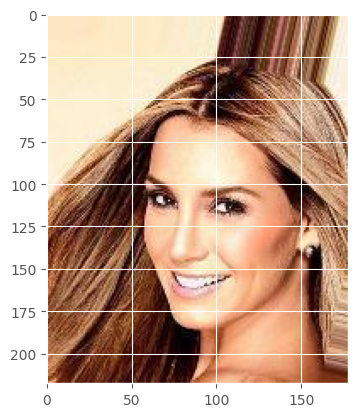

In [3]:
files = os.listdir('img_align_celeba')# img.<tab>
print(os.path.join('img_align_celeba', files[0]))
img=plt.imread(os.path.join('img_align_celeba', files[0]))
plt.imshow(img)

### New function 1: Channel-wise functions

These functions are implemented with numpy, and the modify is based on some channels.

#### New function 1-1: Brighter

When the pixels' value are larger, the image will become brighter.

In [4]:
def brighter(img):
    rate=1.2
    img_bright=rate*img
    img_bright[img_bright>255]=255 # the pixel value larger than 255 will be set to 255
    img_bright=np.round(img_bright)
    img_bright=img_bright.astype(np.uint8)
    return img_bright

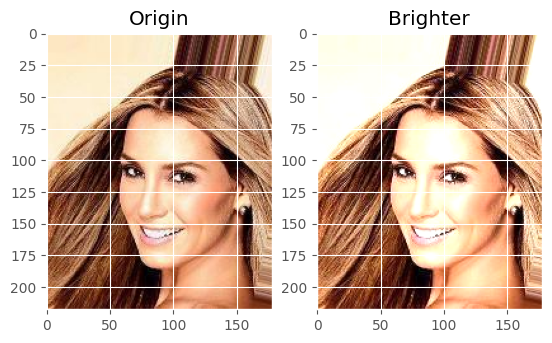

In [5]:
img2=brighter(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Brighter')
plt.imshow(img2)
plt.show()

#### New function 1-2: dimmer

When the pixels' value are smaller, the image will become dimmer.

In [6]:
def dimmer(img):
    rate=0.8
    img_bright=rate*img
    img_bright[img_bright>255]=255 # the pixel value larger than 255 will be set to 255
    img_bright=np.round(img_bright)
    img_bright=img_bright.astype(np.uint8)
    return img_bright

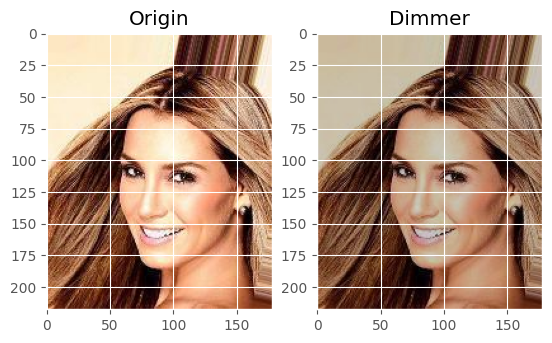

In [7]:
img2=dimmer(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Dimmer')
plt.imshow(img2)
plt.show()

#### New function 1-3: Other Camera Filters

When I make the pixel values of one of the channels larger or smaller, more effect will emerge, and it will give a feeling that brings you to the old days...

In [8]:
def yearpass(img):  
    r=img[:,:,0]  # get three channels
    g=img[:,:,1]
    b=img[:,:,2]
    r=1*r
    g=1*g
    b=12*np.sqrt(b)  # process blue channel
    bth = np.where(b > 255)
    if len(bth[0])>0:
        for i in range(len(bth[0])):
            b[bth[0][i]][bth[1][i]] = 255  # the pixel value larger than 255 will be set to 255
    b=b.astype(np.uint8)
    dst = np.stack([r,g,b],axis=2)
    dst = dst.astype(np.uint8)
    return dst

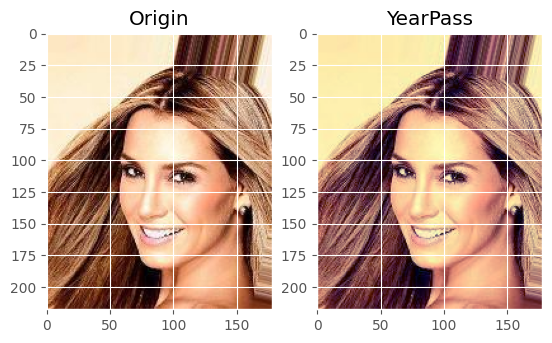

In [9]:
img2=yearpass(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('YearPass')
plt.imshow(img2)
plt.show()

### New function 2: Functions with convolution

In this part, the functions are implemented by using different kernels to make a convolution calculation. With different size of convolution kernel, the image will also be padded. And a 5\*5 gaussian kernel is prepared for use.

In [10]:
def conv(image, kernel):
    # pad the image
    if kernel.shape[0]==3:
        padding=2
    elif kernel.shape[1]==5:
        padding=4
    else:
        raise NotImplementedError # We only consider the kernel with 3*3 and 5*5 size
    image_padded = np.zeros((image.shape[0] + padding, image.shape[1] + padding))
    image_padded[int(padding/2):-int(padding/2), int(padding/2):-int(padding/2)] = image
    output = np.zeros_like(image_padded)
    
    # Loop over every pixel of the image and calculate the convolution
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            output[j, i]=(kernel * image_padded[j: j+padding+1, i: i+padding+1]).sum()

    return output[0:-padding,0:-padding]

In [11]:
gaussian=np.array([[2/159,  4/159,  5/159,  4/159,  2/159],
        [4/159,  9/159,  12/159,  9/159,  4/159],
        [5/159,  12/159,  15/159,  12/159,  5/159],
        [4/159,  9/159,  12/159,  9/159,  4/159],
        [2/159,  4/159,  5/159,  4/159,  2/159]],dtype=np.float32)

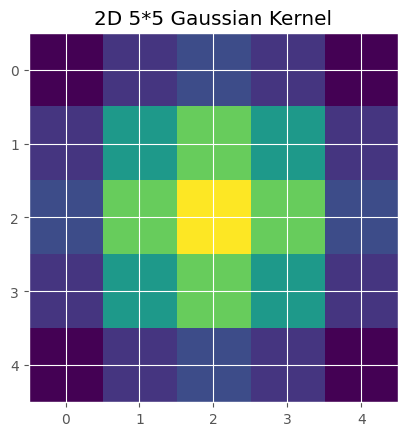

In [12]:
plt.imshow(gaussian)
plt.title('2D 5*5 Gaussian Kernel')
plt.show()

#### New function 2-1: Gaussian Blur

The Blur kernel (showed in function below) aims to use the mean of the adjacent pixel values to replace origin pixel values, which could give people a feeling of blurred.

In [13]:
def blur(img):
    kernel=np.array([[1/16,  1/16,  1/16,  1/16,  1/16],
        [1/16,  0,  0,  0,  1/16],
        [1/16,  0,  0,  0,  1/16],
        [1/16,  0,  0,  0,  1/16],
        [1/16,  1/16,  1/16,  1/16,  1/16]],dtype=np.float32)
    r=img[:,:,0]  # get three channels
    g=img[:,:,1]
    b=img[:,:,2]
    dst_r=conv(r,kernel)
    dst_g=conv(g,kernel)
    dst_b=conv(b,kernel)
    dst = np.stack([dst_r,dst_g,dst_b],axis=2)
    dst = dst.astype(np.uint8)
    return dst

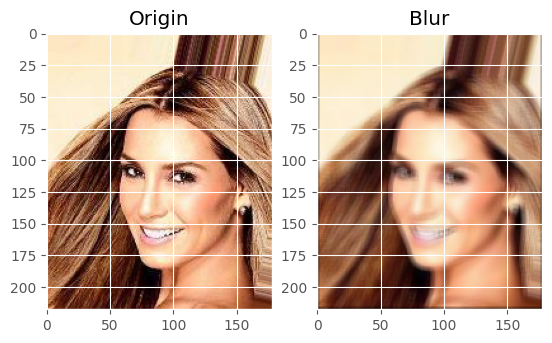

In [14]:
img2=blur(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blur')
plt.imshow(img2)
plt.show()

#### New function 2-2: Smooth

The Smooth kernel (showed in function below) has a similar target with blur kernel, but it still wants to preserve the origin pixel value and make the image seems much more clear.

In [15]:
def smooth(img):
    kernel=np.array([[1/100,  1/100,  1/100,  1/100,  1/100],
        [1/100,  5/100,  5/100,  5/100,  1/100],
        [1/100,  5/100, 44/100,  5/100,  1/100],
        [1/100,  5/100,  5/100,  5/100,  1/100],
        [1/100,  1/100,  1/100,  1/100,  1/100]],dtype=np.float32)
    r=img[:,:,0]  # get three channels
    g=img[:,:,1]
    b=img[:,:,2]
    dst_r=conv(r,kernel)
    dst_g=conv(g,kernel)
    dst_b=conv(b,kernel)
    dst = np.stack([dst_r,dst_g,dst_b],axis=2)
    dst = dst.astype(np.uint8)
    return dst

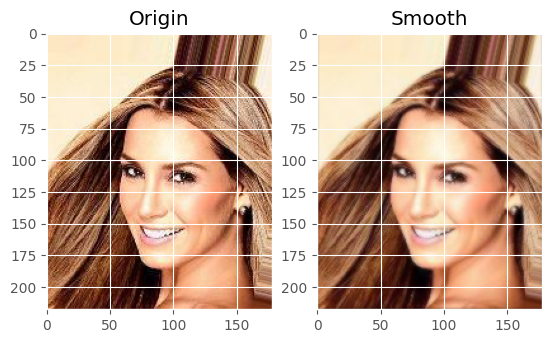

In [16]:
img2=smooth(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Smooth')
plt.imshow(img2)
plt.show()

#### New function 2-3: Reinforce

To reinforce the image, I use 1.5\*origin image to minus 0.5\*blurred image in order to get a more clear image.

In [17]:
def reinforce(img):
    kernel = gaussian
    r=img[:,:,0]  # get three channels
    g=img[:,:,1]
    b=img[:,:,2]
    dst_r=conv(r,kernel)
    dst_g=conv(g,kernel)
    dst_b=conv(b,kernel)
    dst = np.stack([dst_r,dst_g,dst_b],axis=2)
    dst=img*1.5-dst*0.5
    dst = dst.astype(np.uint8)
    return dst

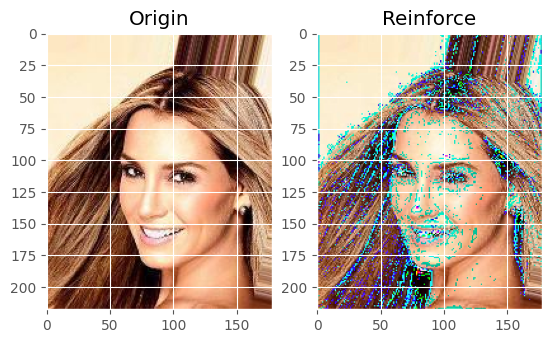

In [18]:
img2=reinforce(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Reinforce')
plt.imshow(img2)
plt.show()

#### New function 2-4: Image contour extraction

The contour extraction kernel will ignore the adjacent pixels and focus on itself to get a contour, which means that the pixels with values that are similar to the adjacent pixels will be transformed to near zero values. 

In [19]:
def contour(img):
    kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]], dtype=np.float32)
    r=img[:,:,0]  # get three channels
    g=img[:,:,1]
    b=img[:,:,2]
    dst_r=conv(r,kernel)
    dst_g=conv(g,kernel)
    dst_b=conv(b,kernel)
    dst = np.stack([dst_r,dst_g,dst_b],axis=2)
    dst = dst.astype(np.uint8)
    return dst

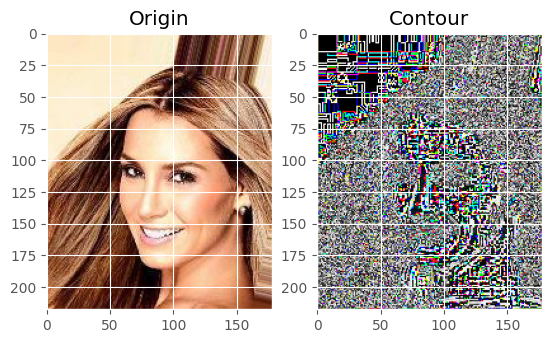

In [20]:
img2=contour(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Contour')
plt.imshow(img2)
plt.show()

### New function 3: Grayscale histogram equalization

Histogram equalization will give a better contrast of the image.

In [21]:
def equalize(img):  # input has only one channel here
    hist=np.bincount(img.flatten(),minlength=256)
    pixel_num=img.shape[0]*img.shape[1]
    hist_arr=hist/pixel_num
    cumu_hist=np.cumsum(hist_arr)  # cumulative distribution of histogram
    transform=np.floor(255*cumu_hist).astype(np.uint8)
    img_list=[transform[i] for i in list(img.flatten())]
    dst=np.reshape(np.array(img_list),(img.shape[0],img.shape[1]))
    return dst

In [22]:
def equal(img):
    r=img[:,:,0]  
    g=img[:,:,1]
    b=img[:,:,2]
    dst_r=equalize(r)
    dst_g=equalize(g)
    dst_b=equalize(b)
    dst = np.stack([dst_r,dst_g,dst_b],axis=2)
    dst = dst.astype(np.uint8)
    return dst

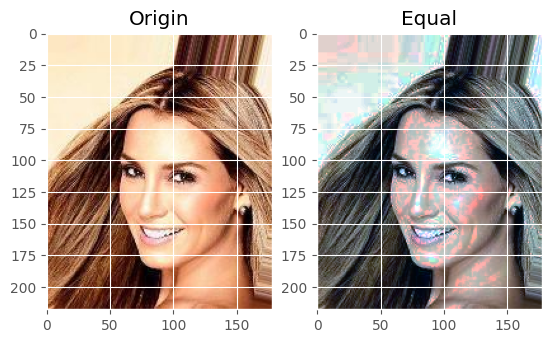

In [23]:
img2=equal(img)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Equal')
plt.imshow(img2)
plt.show()

We can see the histogram before and after our process.

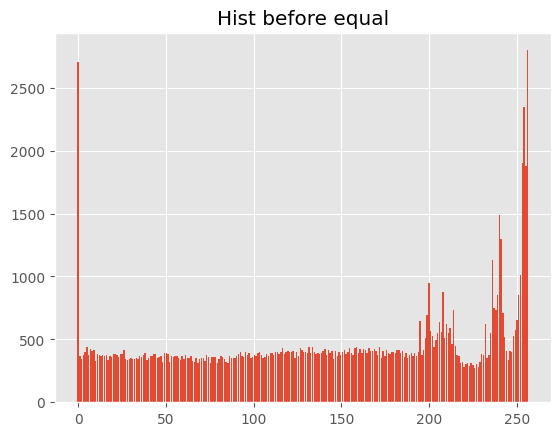

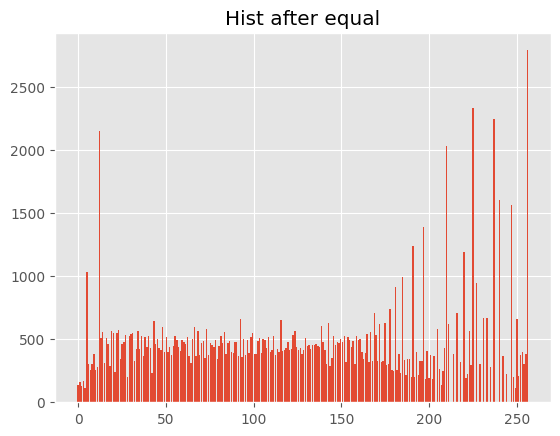

In [24]:
hist=np.bincount(img.flatten(),minlength=256)
hist2=np.bincount(img2.flatten(),minlength=256)
plt.bar(np.linspace(0,256,256),hist)
plt.title('Hist before equal')
plt.show()
plt.bar(np.linspace(0,256,256),hist2)
plt.title('Hist after equal')
plt.show()

### Task2 Use a new image dataset and preprocess them

The new image dataset about the face of a man is downloaded from https://www.kaggle.com/datasets/arpitdw/face-recognition-dataset-binary-class

And I will use a same way and our new functions to process the dataset.

In [25]:
files = os.listdir('face_recog_data')# img.<tab>
image_num=len(files)
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('face_recog_data', files[0]))
plt.imread(os.path.join('face_recog_data', files[0]))
files = [os.path.join('face_recog_data', file_i)
 for file_i in os.listdir('face_recog_data')
 if '.jpg' in file_i]

face_recog_data\WIN_20190405_03_17_16_Pro.jpg


The dataset batch has a shape of $24\times 720\times 1280\times 3$.

In [26]:
imgs = [plt.imread(files[file_i])
        for file_i in range(image_num-1)]
data = np.array(imgs)
print(data.shape)

(23, 720, 1280, 3)


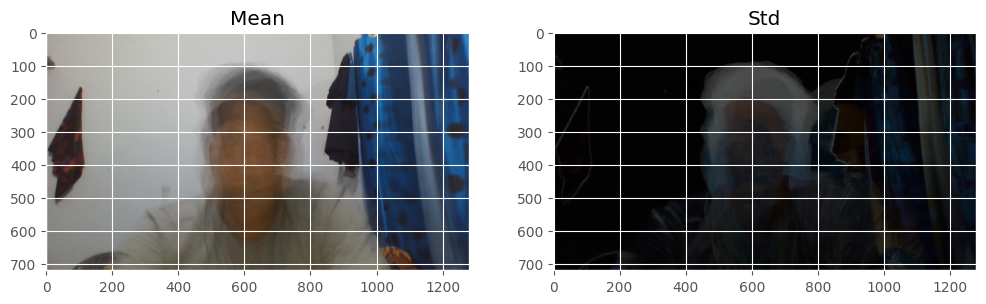

In [27]:
mean_img = np.mean(data, axis=0)
std_img = np.std(data, axis=0)
mean_img=mean_img.astype(np.uint8)
std_img=std_img.astype(np.uint8)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(mean_img)
plt.title('Mean')
plt.subplot(1,2,2)
plt.imshow(std_img)
plt.title('Std')
plt.show()

Now our new functions will be tested on one of those images:

In [28]:
img1=imgs[0]

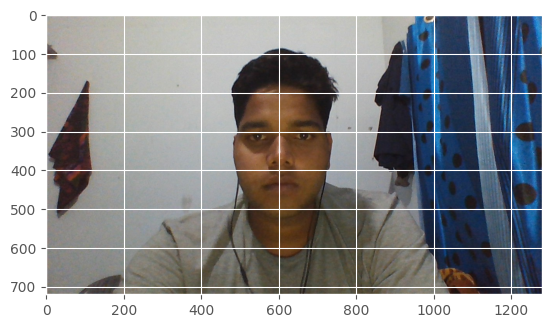

In [29]:
plt.imshow(img1)

In [30]:
# This will take about 1.5 minute since the image from the new dataset is larger than the image provided.
img11=brighter(img1)
img12=dimmer(img1)
img13=contour(img1)
img14=yearpass(img1)
img15=blur(img1)
img16=smooth(img1)
img17=reinforce(img1)
img18=equal(img1)

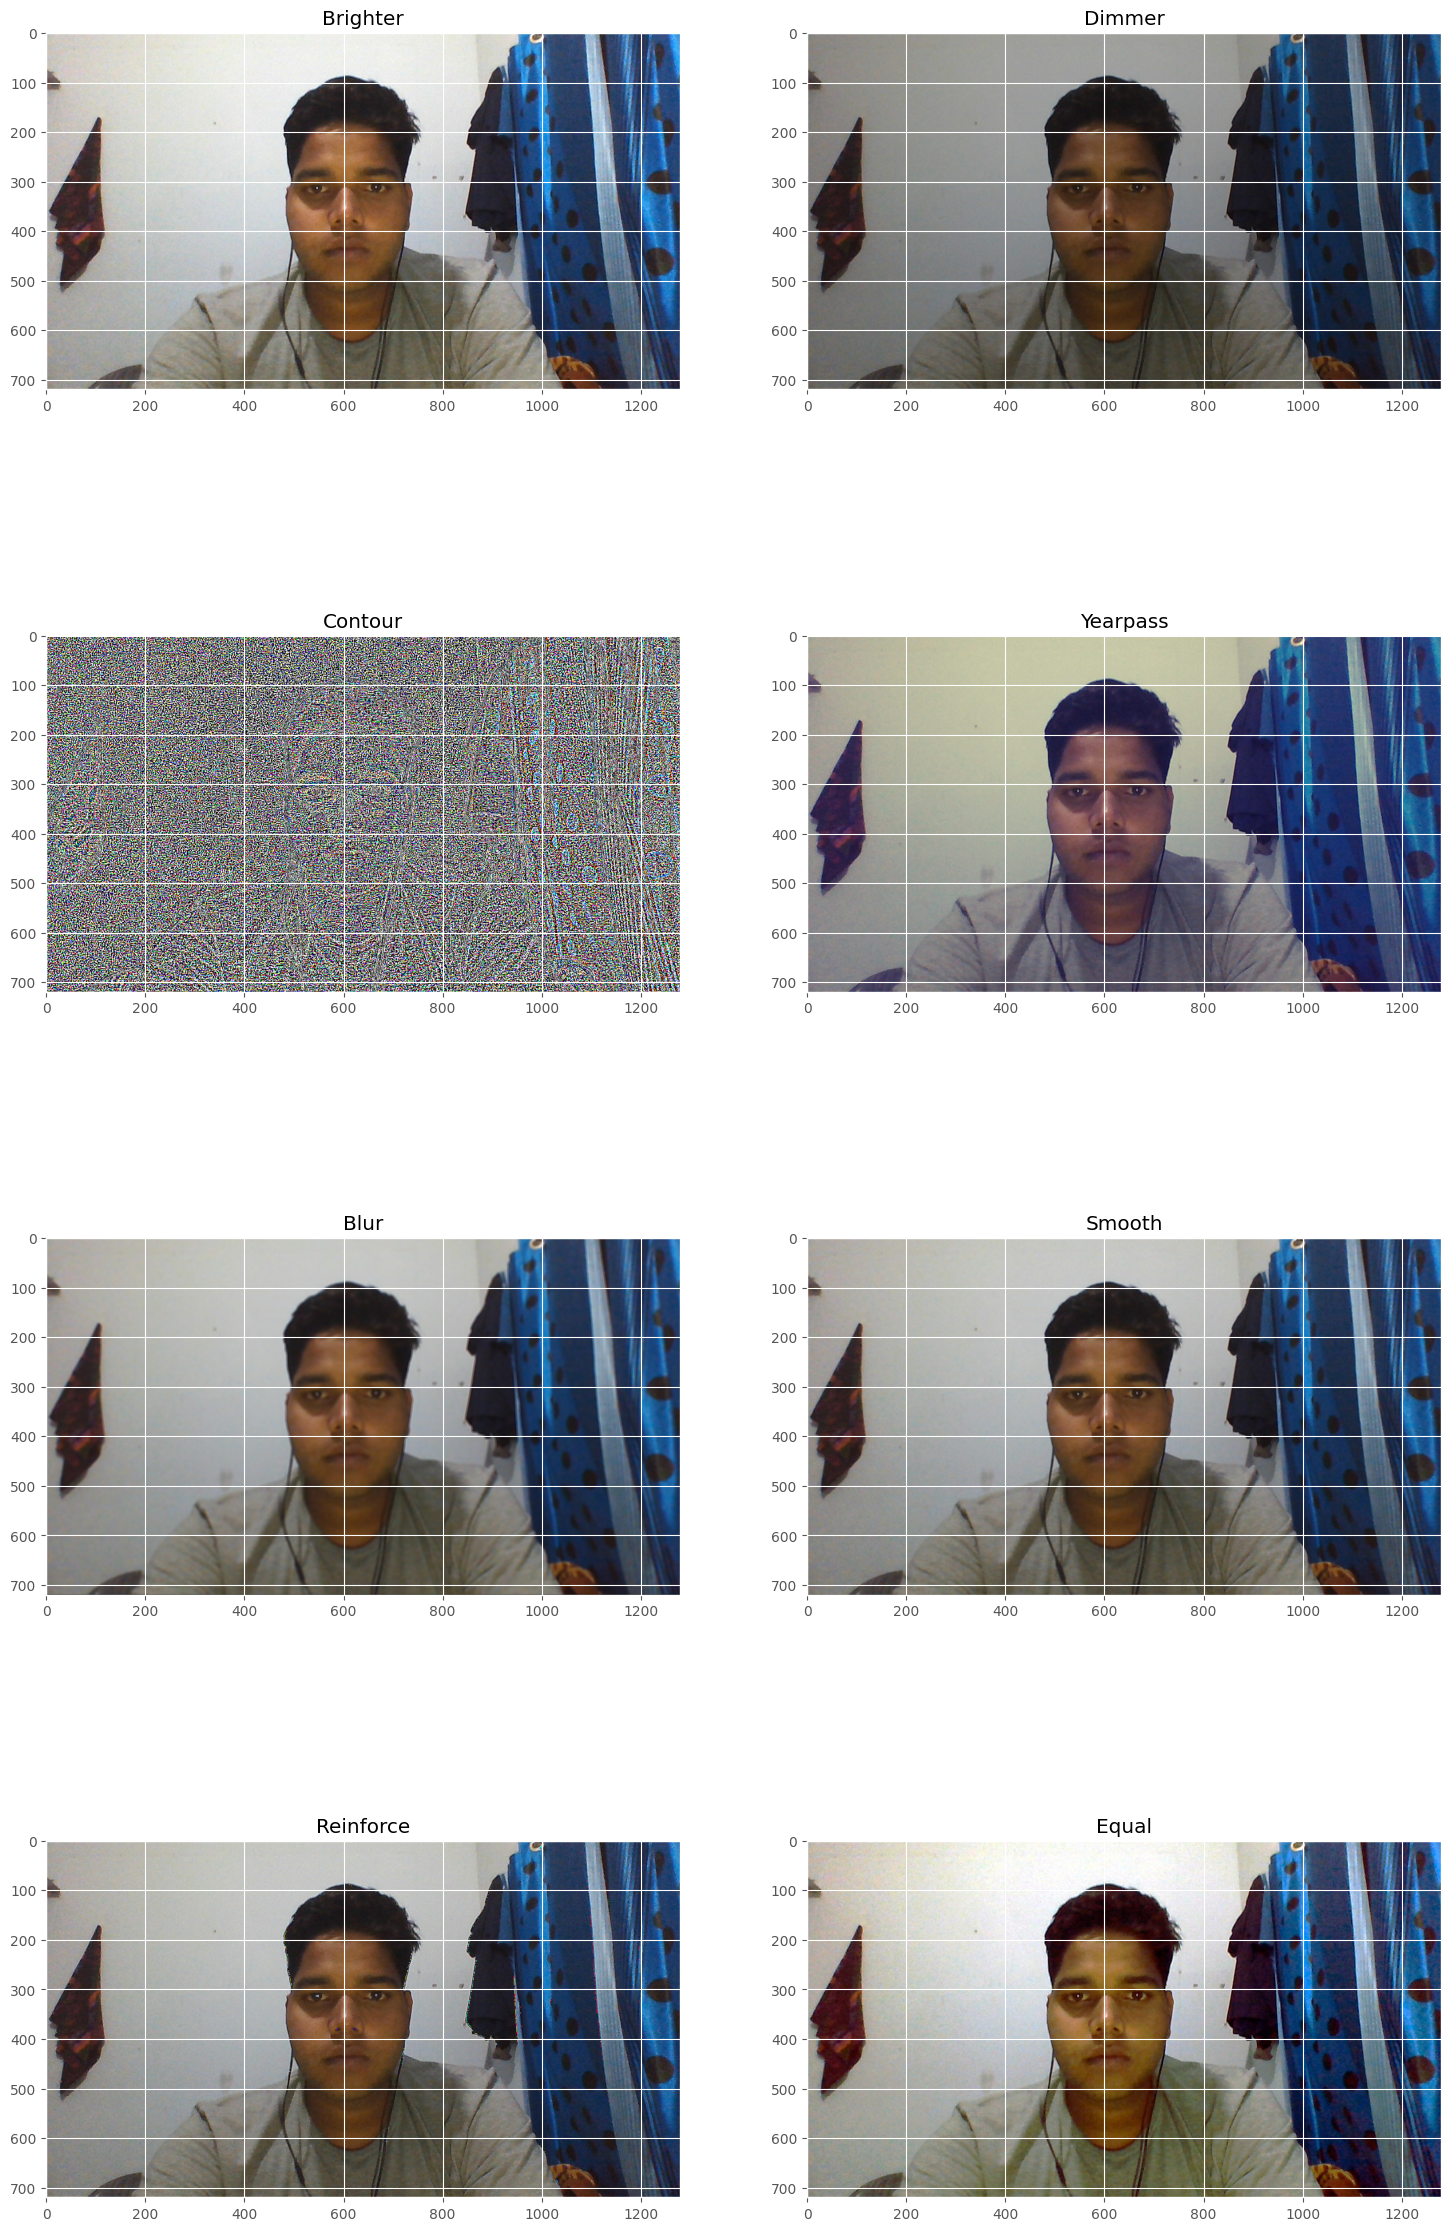

In [31]:
plt.figure(figsize=(18,30))
plt.subplot(4,2,1)
plt.title('Brighter')
plt.imshow(img11)
plt.subplot(4,2,2)
plt.title('Dimmer')
plt.imshow(img12)
plt.subplot(4,2,3)
plt.title('Contour')
plt.imshow(img13)
plt.subplot(4,2,4)
plt.title('Yearpass')
plt.imshow(img14)
plt.subplot(4,2,5)
plt.title('Blur')
plt.imshow(img15)
plt.subplot(4,2,6)
plt.title('Smooth')
plt.imshow(img16)
plt.subplot(4,2,7)
plt.title('Reinforce')
plt.imshow(img17)
plt.subplot(4,2,8)
plt.title('Equal')
plt.imshow(img18)
plt.show()